## `scikit-learn` and Regression Fitting

Let's look at how to make regression fits to our data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def the_dataset():
    inputs = np.arange(0,10)
    np.random.seed(42)
    offsets = np.random.rand(10)
    ys = np.square((1+0.4*offsets)*(inputs-3))
    return inputs, ys

In [3]:
def make_plot(x,y):
    plt.scatter(x,y)

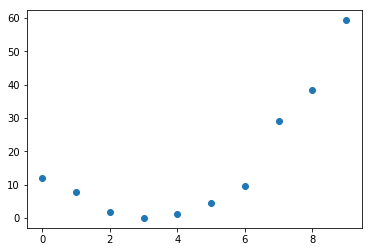

In [4]:
x, y = the_dataset()
make_plot(x,y)

In [5]:
def make_plot_with_h(x,y,h):
    plt.scatter(x,y)
    plt.plot(x,h,color='r')

### Fitting the data

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
reg = LinearRegression()    
X = np.expand_dims(x,axis=1)
reg.fit(X,y)
h = reg.predict(X)
print(reg.score(X,y))

0.570511130296


/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


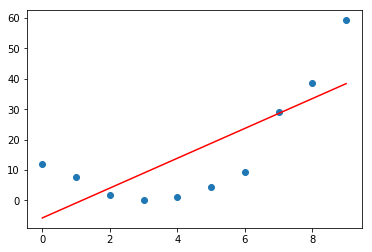

In [8]:
make_plot_with_h(x,y,h)

### Polynomial Fits

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

In [10]:
model = Pipeline([('poly',PolynomialFeatures(2)),('linear', LinearRegression())])
model.fit(X,y)
h2 = model.predict(X)
p = model.named_steps['linear'].coef_
print(p[0],p[1],p[2])
print(model.score(X,y))

0.0 -10.0092449238 1.65806463214
0.98632018502


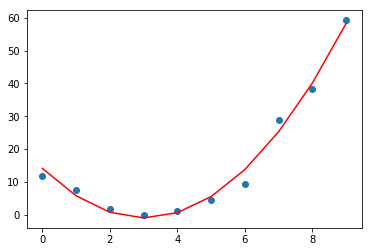

In [11]:
make_plot_with_h(x,y,h2)